## Practical5b

The goal of this part of the practical is to use the dynamic programming
routine that you developed in the first part to solve the dense stero problem.

Use the template below, filling in parts marked "TO DO".


In [50]:
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
import time
from functions import dynamicProgram, dynamicProgramVec
plt.close('all')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
# load in images and ground truth
data = loadmat('StereoData.mat')
im1 = data['im1'].astype('int')
im2 = data['im2'].astype('int')
gt = data['gt'].astype('int')

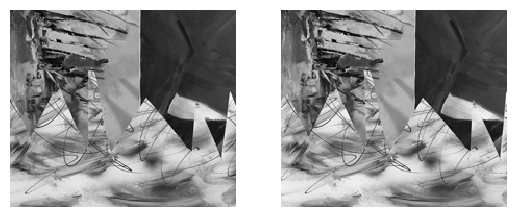

In [52]:
# ground truth disparity is originally expressed in 16'ths of pixels but we 
# will only consider whole-pixel shifts
gtDisp = np.round(gt.astype(float)/16)

im1show = im1
im2show = im2
if np.max(im1) > 1:
    im1show = im1.astype(float)/255.
    im2show = im2.astype(float)/255.
    
# display image
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(im1, cmap='gray', interpolation='nearest', aspect=1)
ax1.axis('off')
ax2.imshow(im2, cmap='gray', interpolation='nearest', aspect=1)
ax2.axis('off')
plt.show()

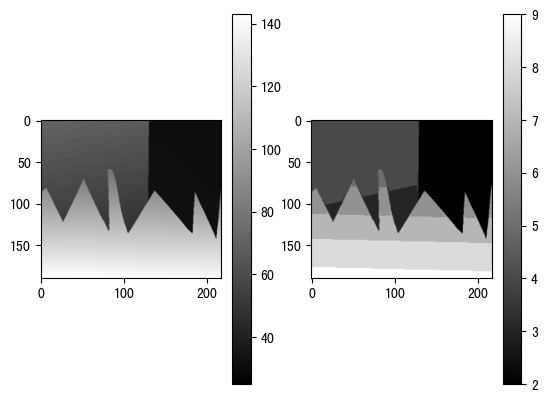

In [53]:
plt.subplot(1, 2, 1)
plt.imshow(gt, cmap='gray')
plt.colorbar()
plt.subplot(1, 2, 2)
plt.imshow(gtDisp, cmap='gray')
plt.colorbar()

### Complete the TODOs in the final cell below

Here we are going to make use of the "dynamicProgram" function we just wrote.

We will first calculate the unary costs before using our function to calculate estimated disparity.

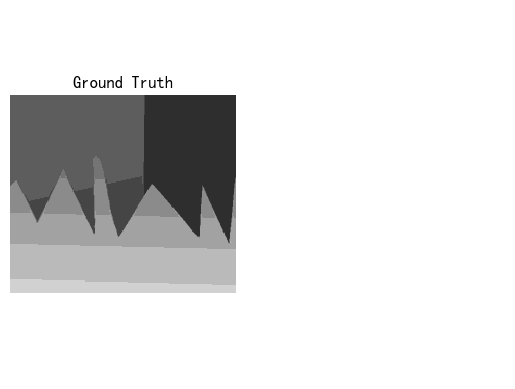

Procesing scanline  0
Procesing scanline  1
Procesing scanline  2
Procesing scanline  3
Procesing scanline  4
Procesing scanline  5
Procesing scanline  6
Procesing scanline  7
Procesing scanline  8
Procesing scanline  9
Procesing scanline  10
Procesing scanline  11
Procesing scanline  12
Procesing scanline  13
Procesing scanline  14
Procesing scanline  15
Procesing scanline  16
Procesing scanline  17
Procesing scanline  18
Procesing scanline  19
Procesing scanline  20
Procesing scanline  21
Procesing scanline  22
Procesing scanline  23
Procesing scanline  24
Procesing scanline  25
Procesing scanline  26
Procesing scanline  27
Procesing scanline  28
Procesing scanline  29
Procesing scanline  30
Procesing scanline  31
Procesing scanline  32
Procesing scanline  33
Procesing scanline  34
Procesing scanline  35
Procesing scanline  36
Procesing scanline  37
Procesing scanline  38
Procesing scanline  39
Procesing scanline  40
Procesing scanline  41
Procesing scanline  42
Procesing scanline  4

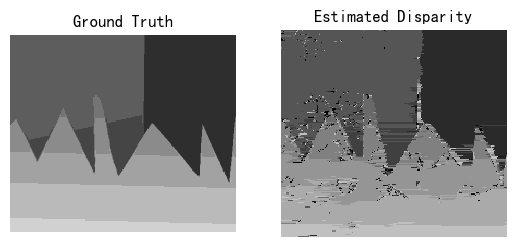

Execution time of dynamic programming is 1.40s


In [67]:
from scipy.stats import multivariate_normal

# figure out size of image
imY = len(im1)
imX = len(im1[0])

# define maximum disparity 
maxDisp = 10

# set up pairwiseCosts - we will define a fixed cost of alpha for changing
# disparity or zero cost for staying the same
alpha = 1
pairwiseCosts = alpha*np.ones([maxDisp,maxDisp])-alpha*np.eye(maxDisp)

# initialize the disparity map that we will estimate
estDisp = np.zeros([imY,imX-maxDisp])

# define standard deviation of noise
noiseSD = 6

# display ground truth and estimated disparity
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
ax2.axis('off')
plt.show()

start_time = time.time()

# run through each line of image
for cY in range(imY):
    print('Procesing scanline ',cY)
    
    # define unary costs - we will not use the last few columns of the
    # image as the disparity might map the pixel outside the valid area of
    # the second image
    unaryCosts = np.zeros([maxDisp,imX-maxDisp])
    
    for cDisp in range(maxDisp):
        cost=np.zeros(imX-maxDisp)
        # for cX in range(imX-maxDisp):
        #     pass
        #     #TODO - calculate cost for this disparity. This is the 
        #     #negative log likelihood, where the likelihood is a Gaussian
        #     #with a mean of the value (i.e. intensity) at the offset pixel 
        #     #in image2 and a standard deviation of "noiseSD". 
        #     mean = im2[cY, cX + cDisp]
        #     std = noiseSD
        #     intensity = im1[cY, cX]
        #     exponent = -0.5*(intensity-mean)**2 / std**2
        #     coefficient = (2*np.pi*std**2)**(-1/2)
        #     prob = coefficient * np.exp(exponent)
        #     cost[cX] = -np.log(prob)
        
        # vectorized method1
        mean = im2[cY, cDisp:(imX - maxDisp + cDisp)]
        std = noiseSD
        intensity = im1[cY, :(imX - maxDisp)]
        exponent = -0.5*(intensity-mean)**2 / std**2
        coefficient = (2*np.pi*std**2)**(-1/2)
        prob = coefficient * np.exp(exponent)
        cost = -np.log(prob)
        # TODO store this cost in the unaryCosts matrix
        unaryCosts[cDisp, :] = cost
    
    # TODO uncomment the line below and call the function that you wrote in the previous section (copy it
    # into the cell above)
    # estDisp[cY,:] = np.transpose(dynamicProgram(unaryCosts,pairwiseCosts))
    estDisp[cY,:] = np.transpose(dynamicProgramVec(unaryCosts,pairwiseCosts))

# display solution so far
f, (ax1, ax2) = plt.subplots(1, 2)
#ax1.clear()
ax1.imshow(gtDisp, vmin=0,vmax=11, cmap='gray', extent=[0,len(gtDisp[0]),0,len(gtDisp)],interpolation='nearest')
ax1.axis('off')
ax1.set_title('Ground Truth')
#ax2.clear()
ax2.imshow(estDisp, vmin=0,vmax=12, cmap='gray', extent=[0,len(estDisp[0]),0,len(estDisp)],interpolation='nearest')
ax2.axis('off')
ax2.set_title('Estimated Disparity')
plt.show()

end_time = time.time()
run_time = end_time - start_time

print(f'Execution time of dynamic programming is {run_time:.2f}s')
    
    
# TODO - investigate how different values of alpha and noiseSD affect the results
# Increase alpha: (impact pairwiseCosts)
# The result image get less spiky, but there are some strips. That's because, with increasing the value of alpha, pairwiseCost increase,
# the model becomes less likely to change the predicted w (disparity).
# Increase noiseSD: (impact unaryCosts)
# Similar result with increase alpha. (less spiky, more strips). the difference between unaryCost get smaller (unaryCost play less important role on total cost),
# which lead to the program get more rely on pairwiseCost. That indicates the predicted w (disparity) is unwilling to change as well.

# TODO (optional) - rewrite the the "dynamicProgram" in the "dynamicProgramVec" function to make it more efficient. 
# Check the improvements by timining the function calls.

# TODO (optional) - you should be able to rewrite this (calculating unary costs) with fewer loops once you have
#the general idea so that it runs faster. Again you can check the speed improvements by timing them.
# 1.for each offset row, apply normal probability on N datapoints
# 2.consider offset row as nDims of data? => multivariate normal probability 构建dDims维数组时也需要循环，和1应该是一样的

# TODO (optional)- adapt the algorithm so that it makes use of colour information